In [58]:
!pip install xgboost

     |████████████████████████████████| 1.2MB 259kB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import random
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [540]:
Data = pd.read_csv('/Users/mac/Desktop/Project1/partial.csv')
Test = pd.read_csv('/Users/mac/Desktop/Project1/test.csv')
Train = pd.read_csv('/Users/mac/Desktop/Project1/train_sample.csv')

In [541]:
print(Data) #24002361 rows x 2 columns
print(Test) #2000 rows x 3 columns
print(Train) #4000 rows x 3 columns

           node_1   node_2
0          540762  1912140
1          540762  1537559
2          540762  3091331
3          540762  2757277
4          540762  3237295
...           ...      ...
24002356  3547024  1075576
24002357  3547024  4549841
24002358  3547024  1135647
24002359  3547024   807274
24002360  3547024  3897045

[24002361 rows x 2 columns]
        Id   source     sink
0        1  3563811  3600160
1        2  2052043  1401960
2        3  4517994  1690636
3        4  1660006  4349447
4        5   581111  1882617
...    ...      ...      ...
1995  1996  1461386  2341683
1996  1997  4057755  1871227
1997  1998  4242514  1413468
1998  1999   555531  1290080
1999  2000  1707829  2373045

[2000 rows x 3 columns]
         from       in  label
0     2893327  4331696      1
1      455376  4697286      1
2      544230   521586      1
3     4238001  1870577      1
4     1249227  1024872      1
...       ...      ...    ...
2995  3761828  3927071      0
2996   379350  2581788      0
2997

In [542]:
#source = list(Test.source)
#source
#sink = list(Test.sink)
#node_test = (source,sink)
#node_test = np.array((source,sink)))
node_test = np.array(Test[['source','sink']])
node_test

node_train = np.array(Train[['from','in']])
node_train

array([[2893327, 4331696],
       [ 455376, 4697286],
       [ 544230,  521586],
       ...,
       [2855029, 1875087],
       [1842133, 2245436],
       [3369468, 2750838]])

In [5]:
DG = nx.from_pandas_edgelist(Data, "node_1", "node_2", create_using=nx.DiGraph())

In [6]:
#all kinds of Sim

def CaculateSim_1 (node_a, node_b):
    a_in_set = set(DG.predecessors(node_a))  
    b_in_set = set(DG.predecessors(node_b))

    if len(a_in_set | b_in_set):
        sim_1 = len(a_in_set & b_in_set)/ len(a_in_set | b_in_set)
        return sim_1
    else:
        return 0


def CaculateSim_2 (node_a, node_b):
    a_out_set = set(DG.successors(node_a))
    b_out_set = set(DG.successors(node_b))

    if len(a_out_set | b_out_set):
        sim_2 = len(a_out_set & b_out_set)/ len(a_out_set | b_out_set)
        return sim_2
    else:
        return 0
    

def CaculateSim_3 (node_a, node_b):
    a_in_set = set(DG.predecessors(node_a))
    b_out_set = set(DG.successors(node_b))

    if len(a_in_set | b_out_set):
        sim_3 = len(a_in_set & b_out_set)/ len(a_in_set | b_out_set)
        return sim_3
    else:
        return 0

    
def CaculateSim_4 (node_a, node_b):
    a_out_set = set(DG.successors(node_a))
    b_in_set = set(DG.predecessors(node_b))

    if len(a_out_set | b_in_set):
        sim_4 = len(a_out_set & b_in_set)/ len(a_out_set | b_in_set)
        return sim_4
    else:
        return 0


In [7]:
sim1_test = []
sim2_test = []
sim3_test = []
sim4_test = []

for node in node_test:
    node_a = node[0]
    node_b = node[1]
    sim1_test.append(CaculateSim_1(node_a,node_b))
    sim2_test.append(CaculateSim_2(node_a,node_b))
    sim3_test.append(CaculateSim_3(node_a,node_b))
    sim4_test.append(CaculateSim_4(node_a,node_b))

In [543]:
sim1_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    sim1_train.append(CaculateSim_1(node_a,node_b))

In [544]:
sim2_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    sim2_train.append(CaculateSim_2(node_a,node_b))

In [545]:
sim3_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    sim3_train.append(CaculateSim_3(node_a,node_b))

In [546]:
sim4_train = []
for node in node_train:
    node_a = node[0]
    node_b = node[1]
    sim4_train.append(CaculateSim_4(node_a,node_b))

In [547]:
len(sim4_train)

3000

In [16]:
#DG.has_edge(540762, 249357)

False

In [17]:
#authority & hub of test

Ath_test = []
Hub_test = []

for node in node_test:
    node_a = node[0]
    node_b = node[1]
    pre = DG.in_degree(node_b)
    suc = DG.out_degree(node_a)
    Ath_test.append(pre)
    Hub_test.append(suc)

In [20]:
len(Ath_test) #2000

2000

In [548]:
#authority & hub of train

Ath_train = []
Hub_train = []

for node in node_train:
    node_a = node[0]
    node_b = node[1]
    pre = DG.in_degree(node_b)
    suc = DG.out_degree(node_a)
    Ath_train.append(pre)
    Hub_train.append(suc)

In [549]:
len(Ath_train)

3000

In [550]:
len(Train['from'])

3000

In [551]:
train_all = pd.DataFrame({'from':Train['from'] ,'in':Train['in'] ,'sim1':sim1_train,'sim2':sim2_train,'sim3':sim3_train,'sim4':sim4_train,'ath':Ath_train, 'hub':Hub_train, 'label':Train['label']})
test_df = pd.DataFrame({'from':Test['source'] ,'in':Test['sink'] ,'sim1':sim1_test,'sim2':sim2_test,'sim3':sim3_test,'sim4':sim4_test,'ath':Ath_test, 'hub':Hub_test})
print(test_df)
print(train_all)

         from       in      sim1  sim2  sim3      sim4  ath  hub
0     3563811  3600160  0.000000   0.0   0.0  0.000000   29   21
1     2052043  1401960  0.000000   0.0   0.0  0.000000    9   71
2     4517994  1690636  0.021053   0.0   0.0  0.009091   17  205
3     1660006  4349447  0.030303   0.0   0.0  0.003711   36  505
4      581111  1882617  0.000000   0.0   0.0  0.000000   46   18
...       ...      ...       ...   ...   ...       ...  ...  ...
1995  1461386  2341683  0.000000   0.0   0.0  0.000000    2   53
1996  4057755  1871227  0.010753   0.0   0.0  0.000000   41   95
1997  4242514  1413468  0.000000   0.0   0.0  0.000000    2   27
1998   555531  1290080  0.000000   0.0   0.0  0.000000    3   56
1999  1707829  2373045  0.000000   0.0   0.0  0.000000    2  244

[2000 rows x 8 columns]
         from       in      sim1     sim2      sim3      sim4  ath    hub  \
0     2893327  4331696  0.074627  0.00000  0.000000  0.004403   44   2237   
1      455376  4697286  0.000000  0.00000

In [552]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(train_all, test_size=0.2, random_state=1)

In [553]:
X_train = train_df.drop("label", axis=1)
Y_train = train_df["label"]
X_valid = valid_df.drop("label", axis=1)
Y_valid = valid_df["label"]
X_valid

,from,in,sim1,sim2,sim3,sim4,ath,hub
1957,3845148,958295,0.000000,0.0,0.0,0.000000,2,3927
2087,294336,2179521,0.000000,0.0,0.0,0.000000,1,368
1394,427805,1782146,0.031716,0.0,0.0,0.000083,70,156905
1520,2209891,3165228,0.033654,0.0,0.0,0.001723,11,4059
1098,2101710,2809754,0.408163,0.0,0.0,0.011611,124,6933
...,...,...,...,...,...,...,...,...
2495,4390289,736229,0.000000,0.0,0.0,0.000000,1,197
94,439557,4340561,0.001433,0.0,0.0,0.000049,7,61739
2742,457215,732579,0.000000,0.0,0.0,0.000000,1,1057
1999,4492248,2811644,0.040650,0.0,0.0,0.005414,147,17123


In [554]:
sc = StandardScaler()

features = ["sim1","sim2","sim3","sim4"]

X_train = sc.fit_transform(train_df[features]) 

X_valid = sc.fit_transform(valid_df[features])

In [555]:
Y_train

268     1
32      1
199     1
1488    1
228     1
       ..
2763    0
905     1
1096    1
235     1
1061    1
Name: label, Length: 2400, dtype: int64

In [556]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier

85.33

In [477]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier

84.79

In [131]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier #99.84

TypeError: __init__() got an unexpected keyword argument 'probability'

In [132]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_prob(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier #100

TypeError: __init__() got an unexpected keyword argument 'probability'

In [133]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier #100

TypeError: __init__() got an unexpected keyword argument 'probability'

In [134]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier 

TypeError: __init__() got an unexpected keyword argument 'probability'

In [557]:
from xgboost import XGBClassifier
classifier = XGBClassifier(probability = True)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict_proba(X_valid)

from sklearn.metrics import roc_auc_score as score
classifier.score(X_train, Y_train)
classifier = round(classifier.score(X_train, Y_train) * 100, 2)
classifier 

[21:02:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { probability } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




95.88

In [558]:
train_new = pd.DataFrame({'from':Train['from'] ,'in':Train['in'] ,'sim1':sim1_train,'sim2':sim2_train,'sim3':sim3_train,'sim4':sim4_train,'ath':Ath_train, 'hub':Hub_train, 'label':Train['label']})
train_new

,from,in,sim1,sim2,sim3,sim4,ath,hub,label
0,2893327,4331696,0.074627,0.00000,0.000000,0.004403,44,2237,1
1,455376,4697286,0.000000,0.00000,0.000000,0.000000,3,190,1
2,544230,521586,0.322470,0.10794,0.030209,0.009697,781,60755,1
3,4238001,1870577,0.055741,0.00000,0.000000,0.000817,78,61151,1
4,1249227,1024872,0.045322,0.00000,0.000000,0.004142,94,7421,1
...,...,...,...,...,...,...,...,...,...
2995,3761828,3927071,0.000000,0.00000,0.000000,0.000000,1,4,0
2996,379350,2581788,0.000000,0.00000,0.000000,0.000000,2,57,0
2997,2855029,1875087,0.000000,0.00000,0.000000,0.000000,3,122,0
2998,1842133,2245436,0.000000,0.00000,0.000000,0.000000,1,10,0


In [559]:
X = train_new.drop("label", axis=1)
Y = train_new["label"]

features = ["sim1","sim2","sim3","sim4"]

sc1 = StandardScaler()

X = sc1.fit_transform(X[features]) 
X_test = sc1.fit_transform(test_df[features]) 
len(X)

3000

In [560]:
from xgboost import XGBClassifier
classifier = XGBClassifier(probability = True)
classifier.fit(X_train, Y_train)
classifier.fit(X, Y)
Y_pred = classifier.predict_proba(X_test)

[21:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { probability } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:02:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { probability } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




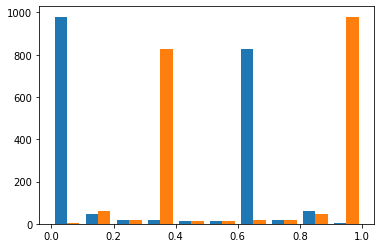

In [561]:
plt.hist(Y_pred)
plt.show()

In [562]:
Y_pred

array([[0.61285967, 0.38714033],
       [0.61285967, 0.38714033],
       [0.01336485, 0.98663515],
       ...,
       [0.61285967, 0.38714033],
       [0.61285967, 0.38714033],
       [0.61285967, 0.38714033]], dtype=float32)

In [563]:
pred = []

for a in Y_pred:
    pred.append(a[1])

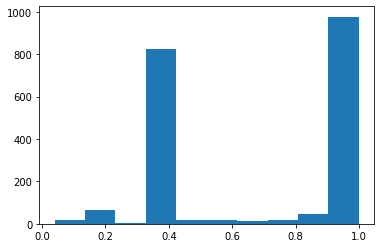

In [564]:
plt.hist(pred)
plt.show()

In [581]:
ar = np.array(pred)
#ar[ar>0.5] = 0.5
ar[ar<0.7] = ar[ar<0.7]/5
#956个，基本确定是1
#len(ar[ar<0.9]) #773,这就是整体的bias造成的，整体偏大

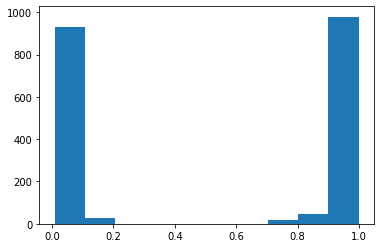

In [582]:
plt.hist(ar)
plt.show()

In [583]:
ID = list(Test["Id"])

In [585]:
submission = pd.DataFrame({"Id": ID,"Predicted": ar})

In [586]:
submission.head(100)

,Id,Predicted
0,1,0.077428
1,2,0.077428
2,3,0.986635
3,4,0.998397
4,5,0.077428
...,...,...
95,96,0.077428
96,97,0.997022
97,98,0.851745
98,99,0.077428


In [587]:
submission.to_csv('/Users/mac/Desktop/Project1/sbm4.csv', index = False, header = True)